In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
ITERATION = 6

In [3]:
uvvis_data = pd.read_excel("./uvvis/itr_%d.xlsx"%ITERATION, engine='openpyxl')
water = uvvis_data.iloc[:,-1].to_numpy()
wavelength = uvvis_data["Wavelength"].to_numpy()
well_names = uvvis_data.columns[1:-1].to_numpy()
print(well_names)

['H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'H10' 'H11']


In [4]:
volumes = pd.read_csv("./opentrons/volumes_%d.csv"%ITERATION)
times = pd.read_csv("./opentrons/times_%d.csv"%ITERATION)

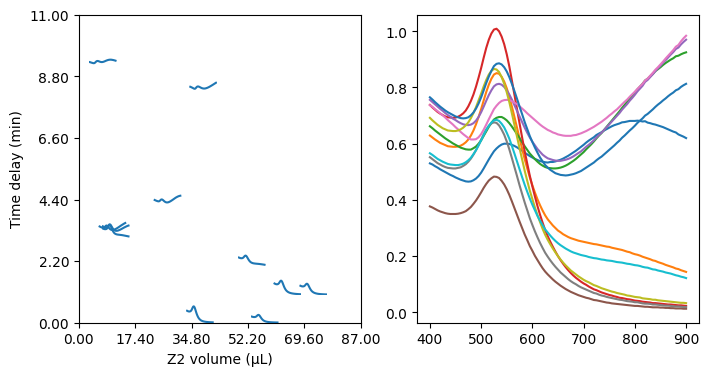

In [5]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

spectra = []
for well_name in well_names:
    y = uvvis_data[well_name].values-water
    spectra.append(y)

spectra = np.asarray(spectra)
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
fig, axs = plt.subplots(1,2, figsize=(2*4,4))
comps = np.vstack((volumes['Z2'].values, times['DT4'].values)).T
plot_phasemap(bounds, axs[0], comps, spectra, limits=[0,1.9])
axs[0].set_xlabel('Z2 volume (µL)')
axs[0].set_ylabel('Time delay (min)') 

for si in spectra:
    axs[1].plot(wavelength, si)
plt.show()

In [6]:
np.save("./data/spectra_%d.npy"%ITERATION, spectra)
np.save("./data/wav.npy", wavelength)